In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw6.ipynb")

# CPSC 330 - Applied Machine Learning

## Homework 6: Clustering
### Associated lectures: Lectures 14 and 15

**Due date: Check the [Calendar](https://htmlpreview.github.io/?https://github.com/UBC-CS/cpsc330/blob/master/docs/calendar.html)**

## Imports <a name="im"></a>

In [2]:
import os
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
pd.set_option("display.max_colwidth", 0)

<br><br><br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
## Instructions
rubric={points}

You will earn points for following these instructions and successfully submitting your work on Gradescope.  

### Group wotk instructions

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2.
  
- Use group work as an opportunity to collaborate and learn new things from each other.
- Be respectful to each other and make sure you understand all the concepts in the assignment well.
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline.
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


### General submission instructions

- Please **read carefully
[Use of Generative AI policy](https://ubc-cs.github.io/cpsc330-2025W1/syllabus.html#use-of-generative-ai-in-the-course)** before starting the homework assignment.
- **Run all cells before submitting:** Go to `Kernel -> Restart Kernel and Clear All Outputs`, then select `Run -> Run All Cells`. This ensures your notebook runs cleanly from start to finish without errors.
  
- **Submit your files on Gradescope.**  
   - Upload only your `.ipynb` file **with outputs displayed** and any required output files.
     
   - Do **not** submit other files from your repository.  
   - If you need help, see the [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/).  
- **Check that outputs render properly.**  
   - Make sure all plots and outputs appear in your submission.
     
   - If your `.ipynb` file is too large and doesn't render on Gradescope, also upload a PDF or HTML version so the TAs can view your work.  
- **Keep execution order clean.**  
   - Execution numbers must start at "1" and increase in order.
     
   - Notebooks without visible outputs may not be graded.  
   - Out-of-order or missing execution numbers may result in mark deductions.  
- **Follow course submission guidelines:** Review the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2025W1/docs/homework_instructions.html) for detailed guidance on completing and submitting assignments.
   
</div>

_Points:_ 4

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 1: Document clustering warm-up
<hr>

In this homework, we will explore a popular application of clustering called [**document clustering**](https://en.wikipedia.org/wiki/Document_clustering). A large amount of unlabeled text data is available out there (e.g., news, recipes, online Q&A, tweets), and clustering is a commonly used technique to organize this data in a meaningful way.

As a warm up, in this exercise you will cluster sentences from a toy corpus. Later in the homework you will work with a real corpus.

The code below extracts introductory sentences of Wikipedia articles on a set of queries. To run the code successfully, you will need the `wikipedia` package installed in the course environment.

```
conda activate cpsc330
conda install -c conda-forge wikipedia
```


**Your tasks:**

Run the code below which
- extracts content of Wikipedia articles on a set of queries
- tokenizes the text (i.e., separates sentences) and
- stores the 2nd sentence in each article as a document representing that article

> Feel free to experiment with Wikipedia queries of your choice. But stick to the provided list for the final submission so that it's easier for the TAs to grade your submission.

> For tokenization we are using the `nltk` package. If you do not have this package in the course environment, you will have to install it.

```
conda activate cpsc330
conda install -c anaconda nltk
```

Even if you have the package installed via the course `conda` environment, you might have to download `nltk` pre-trained models, which can be done with the code below.

In [3]:
import nltk

nltk.download("punkt")
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /Users/kiki/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/kiki/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [4]:
#!pip install wikipedia #uncomment this if need to install wikipedia

In [5]:
import wikipedia
import string
from nltk.tokenize import sent_tokenize, word_tokenize

queries = [
    "Artificial Intelligence",
    "Deep learning",
    "Unsupervised learning",
    "Quantum Computing",
    "Environmental protection",
    "Climate Change",
    "Renewable Energy",
    "Biodiversity",
    "French Cuisine",
    "Bread food",
    "Dumpling food",
]
wiki_dict = {"wiki query": [], "text": [], "n_words": []}
remove_tokens = list(string.punctuation) + ['``', '’', '`', 'br', '"', "”", "''", "'s", "(", ")", "[", "]"]

# Running this code might take some time.
for query in queries:
    try:
        # Attempt to fetch the page content
        page_content = wikipedia.page(query).content
    except wikipedia.exceptions.PageError:
        print(f"Page not found for query: {query}. Skipping...")
        continue
    except wikipedia.exceptions.DisambiguationError as e:
        print(f"Query: {query} led to a disambiguation page. Choosing the first option: {e.options[0]}")
        page_content = wikipedia.page(e.options[0]).content

    text = sent_tokenize(page_content)[0]
    tokenized = word_tokenize(text)
    text_pp = [token.lower() for token in tokenized if token.lower() not in remove_tokens]
    wiki_dict["n_words"].append(len(text_pp))
    wiki_dict["text"].append(" ".join(text_pp))
    wiki_dict["wiki query"].append(query)

wiki_df = pd.DataFrame(wiki_dict)
wiki_df

,wiki query,text,n_words
0,Artificial Intelligence,artificial intelligence ai is the capability of computational systems to perform tasks typically associated with human intelligence such as learning reasoning problem-solving perception and decision-making,25
1,Deep learning,in machine learning deep learning focuses on utilizing multilayered neural networks to perform tasks such as classification regression and representation learning,21
2,Unsupervised learning,in machine learning supervised learning sl is a type of machine learning paradigm where an algorithm learns to map input data to a specific output based on example input-output pairs,30
3,Quantum Computing,a quantum computer is a real or theoretical computer that uses quantum mechanical phenomena in an essential way it exploits superposed and entangled states and the intrinsically non-deterministic outcomes of quantum measurements as features of its computation,37
4,Environmental protection,environmental protection or environment protection refers to the taking of measures to protecting the natural environment prevent pollution and maintain ecological balance,22
5,Climate Change,present-day climate change includes both global warming—the ongoing increase in global average temperature—and its wider effects on earth climate system,20
6,Renewable Energy,renewable energy also called green energy is energy made from renewable natural resources that are replenished on a human timescale,20
7,Biodiversity,biodiversity is the variability of life on earth,8
8,French Cuisine,french cuisine is the cooking traditions and practices of france,10
9,Bread food,bread is a baked food product made from water flour and often yeast,13


Our toy corpus has six toy documents (`text` column in the dataframe) extracted from Wikipedia queries.

<br><br>

<!-- BEGIN QUESTION -->

### 1.1 How many clusters?
rubric={reasoning}

<div class="alert alert-info">

**Your tasks:**

- If tasked with manually clustering documents from this toy corpus, how many clusters would you identify, and what labels would you assign to each cluster?
</div>

<div class="alert alert-warning">

Solution_1.1
    
</div>

_Points:_ 1

I would split into 3 clusters:

1) Computing / ML

Queries: Artificial Intelligence, Deep learning, Unsupervised learning, Quantum Computing

Because there is a heavy overlap in vocab like learning, neural, algorithm, model, data, computing, quantum.

2) Environment & Sustainability

Queries: Environmental protection, Climate Change, Renewable Energy, Biodiversity

Because of the shared terms like environment, climate, energy, protection, species, ecosystems, emissions.

3) Food / Cuisine

Queries: French Cuisine, Bread food, Dumpling food

Because of the culinary vocabulary (cuisine, dish, bread, dough, dumpling, cooking, regional).

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.2 K-Means with bag-of-words representation
rubric={accuracy}

In the lecture, we explored how **data representation significantly impacts clustering quality**. We saw that replacing a **flattened image representation** with feature vectors extracted from **pre-trained models** greatly improved clustering results.  

What about text data? In previous machine learning courses, we have used the **bag-of-words (BoW) representation** to numerically encode text, where each document is represented with a vector of word frequencies.

In this exercise, you will **cluster documents** using this **simplistic text representation**.  

<div class="alert alert-info">

**Your tasks:**

1. Use [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) with its **default settings** to transform the `text` column in `wiki_df` into a numerical representation.  

2. Use [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) to cluster the encoded documents and store the cluster labels in `kmeans_bow_labels`.  
   - Set `random_state=42` for **reproducibility**.
     
   - Use the **number of clusters** (`n_clusters`) identified in the **previous exercise**.  
</div>

<div class="alert alert-warning">

Solution_1.2
    
</div>

_Points:_ 2

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

n_clusters = 3

vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(wiki_df["text"])



In [7]:

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_bow)

kmeans_bow_labels = kmeans.labels_

In [8]:
wiki_df["bow_kmeans"] = kmeans_bow_labels
wiki_df

,wiki query,text,n_words,bow_kmeans
0,Artificial Intelligence,artificial intelligence ai is the capability of computational systems to perform tasks typically associated with human intelligence such as learning reasoning problem-solving perception and decision-making,25,1
1,Deep learning,in machine learning deep learning focuses on utilizing multilayered neural networks to perform tasks such as classification regression and representation learning,21,2
2,Unsupervised learning,in machine learning supervised learning sl is a type of machine learning paradigm where an algorithm learns to map input data to a specific output based on example input-output pairs,30,2
3,Quantum Computing,a quantum computer is a real or theoretical computer that uses quantum mechanical phenomena in an essential way it exploits superposed and entangled states and the intrinsically non-deterministic outcomes of quantum measurements as features of its computation,37,1
4,Environmental protection,environmental protection or environment protection refers to the taking of measures to protecting the natural environment prevent pollution and maintain ecological balance,22,0
5,Climate Change,present-day climate change includes both global warming—the ongoing increase in global average temperature—and its wider effects on earth climate system,20,1
6,Renewable Energy,renewable energy also called green energy is energy made from renewable natural resources that are replenished on a human timescale,20,1
7,Biodiversity,biodiversity is the variability of life on earth,8,1
8,French Cuisine,french cuisine is the cooking traditions and practices of france,10,1
9,Bread food,bread is a baked food product made from water flour and often yeast,13,1


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.3 K-Means with sentence embedding representation
rubric={accuracy}

In the previous exercise, you may have noticed that clustering results were suboptimal. While the bag-of-words (BoW) representation is useful, it has significant limitations. It does not capture word order or context effectively.  

To improve text representation, we can use pre-trained models, similar to those used for image data, to extract richer, context-aware embeddings through transfer learning. In this lab, we will use the **pre-trained model** `'all-MiniLM-L6-v2'`, available via the [Sentence Transformers](https://www.sbert.net/index.html) package.  

This deep learning model generates **dense, fixed-length vector representations** of sentences, capturing **semantic meaning and contextual information**. These representations are particularly effective for **clustering and semantic similarity tasks**. If you're interested in exploring more **pre-trained models**, refer to the [full list here](https://www.sbert.net/docs/pretrained_models.html). We will explore these representations further in **DSCI 575**.  

<div class="alert alert-info">

**Your tasks:**

1. Run the code below to create sentence embedding representation of documents in our toy corpus.
   
3. Apply `KMeans` to the **sentence embeddings** (`emb_sents`) and store the cluster labels in `kmeans_emb_labels`. Use the following parameters:  
    - `random_state=42` (for reproducibility)
      
    - `n_clusters`=the number of clusters you identified in 1.1

Note
- The code below might throw a warning. You may ignore it for the purpose of this lab.
</div>

In [9]:
from sentence_transformers import SentenceTransformer

embedder = SentenceTransformer("all-MiniLM-L6-v2")

In [10]:
emb_sents = embedder.encode(wiki_df["text"].tolist())
emb_sent_df = pd.DataFrame(emb_sents, index=wiki_df.index)
emb_sent_df

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,-0.005857,-0.004795,-0.000976,0.011121,0.005294,-0.061630,0.062072,0.033673,-0.035251,0.074072,...,0.088312,-0.006600,0.036511,-0.020797,-0.002082,0.058263,0.061880,0.097383,0.058155,-0.052016
1,-0.124845,-0.084891,0.082492,0.017458,0.022980,0.056852,-0.060654,-0.060344,-0.020284,-0.070916,...,0.082265,0.009324,-0.005929,-0.130974,0.002398,0.052424,-0.008989,0.015588,-0.017662,-0.018494
2,-0.056721,-0.049697,-0.014780,0.022572,0.051773,0.007456,0.008632,-0.074847,-0.065573,-0.027284,...,0.014761,-0.022392,0.021360,-0.107016,0.020530,0.045678,0.052755,0.005429,0.022018,-0.010994
3,-0.072006,0.006120,-0.085242,0.051515,-0.119035,0.015745,-0.006809,-0.064673,0.004276,0.018436,...,-0.067665,0.031661,-0.017610,-0.072480,-0.008318,0.127195,0.033353,0.084555,0.015101,0.020704
4,-0.012700,0.101830,0.066676,-0.007987,0.140040,0.041627,0.035495,-0.050723,-0.037633,0.055886,...,-0.042105,-0.038883,0.018268,0.009920,0.028208,0.052759,-0.009605,-0.004518,0.060853,0.057709
5,-0.014444,0.022869,0.145982,0.054865,0.085204,-0.014689,-0.102757,0.016853,-0.023799,0.021148,...,0.011778,0.016817,-0.020041,0.006375,0.055428,0.076868,-0.047152,-0.114797,-0.056382,0.022349
6,-0.044869,0.076882,-0.012749,0.033335,0.067894,-0.002327,0.031620,-0.021576,0.046619,0.005089,...,-0.021575,-0.017596,-0.069995,0.004461,-0.040409,-0.043067,0.044042,-0.050977,0.056506,0.048708
7,0.027806,0.077117,0.015402,-0.013544,0.043216,0.048124,0.027763,-0.022999,0.049303,0.009686,...,0.014946,-0.020896,0.022283,-0.012311,0.014079,0.028085,0.025272,-0.015233,-0.014879,-0.064280
8,0.026616,-0.019929,-0.008049,-0.025907,-0.055372,0.011235,-0.024538,-0.065724,0.058374,-0.062895,...,-0.059513,0.077446,-0.059827,-0.021454,0.088102,-0.127180,-0.031399,0.120572,0.072373,-0.058336
9,-0.014786,0.055887,-0.020880,0.005313,-0.025037,0.040478,0.035260,0.024938,0.017546,0.072433,...,-0.082098,0.037856,-0.020007,-0.087252,0.058163,-0.044187,-0.030253,-0.080385,0.075614,-0.070403


<div class="alert alert-warning">

Solution_1.3
    
</div>

_Points:_ 2

In [11]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(emb_sents)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [12]:
#kmeans_emb_labels = ...
kmeans_emb_labels = kmeans.labels_

In [13]:
wiki_df["emb_kmeans"] = kmeans_emb_labels
wiki_df

,wiki query,text,n_words,bow_kmeans,emb_kmeans
0,Artificial Intelligence,artificial intelligence ai is the capability of computational systems to perform tasks typically associated with human intelligence such as learning reasoning problem-solving perception and decision-making,25,1,2
1,Deep learning,in machine learning deep learning focuses on utilizing multilayered neural networks to perform tasks such as classification regression and representation learning,21,2,2
2,Unsupervised learning,in machine learning supervised learning sl is a type of machine learning paradigm where an algorithm learns to map input data to a specific output based on example input-output pairs,30,2,2
3,Quantum Computing,a quantum computer is a real or theoretical computer that uses quantum mechanical phenomena in an essential way it exploits superposed and entangled states and the intrinsically non-deterministic outcomes of quantum measurements as features of its computation,37,1,2
4,Environmental protection,environmental protection or environment protection refers to the taking of measures to protecting the natural environment prevent pollution and maintain ecological balance,22,0,0
5,Climate Change,present-day climate change includes both global warming—the ongoing increase in global average temperature—and its wider effects on earth climate system,20,1,0
6,Renewable Energy,renewable energy also called green energy is energy made from renewable natural resources that are replenished on a human timescale,20,1,0
7,Biodiversity,biodiversity is the variability of life on earth,8,1,0
8,French Cuisine,french cuisine is the cooking traditions and practices of france,10,1,1
9,Bread food,bread is a baked food product made from water flour and often yeast,13,1,1


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.4 DBSCAN with sentence embedding representation and cosine distance  
rubric={accuracy}

Now, let's apply [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) to our toy dataset.  

Unlike K-Means, which relies on Euclidean distance due to its use of centroids, DBSCAN allows us to experiment with different distance metrics. For text data, [**cosine similarity**](https://scikit-learn.org/stable/modules/metrics.html#cosine-similarity) (or its complement, **cosine distance**) is often more effective than Euclidean distance.  

The **cosine distance** between two vectors $u$ and $v$ is defined as:

$$distance_{cosine}(u,v) = 1 - (\frac{u \cdot v}{\left\lVert u\right\rVert_2 \left\lVert v\right\rVert_2})$$

<div class="alert alert-info">

**Your tasks:**

- Apply **DBSCAN** to cluster documents encoded with **sentence embeddings** (`emb_sents`) and store the cluster labels in `dbscan_emb_labels`.
    
- Set `metric='cosine'` to use **cosine distance** for clustering.
- Tune the **hyperparameters** `eps` and `min_samples` to obtain meaningful clusters, as the default values are unlikely to work well on this dataset.  

**Notes for tuning the hyperparameters:**

- Start by examining the minimum, maximum, and mean cosine distances in the dataset. You can compute pairwise cosine distances using the package imported below.
  
- Experiment with a range of `eps` values and print the number of clusters and their sizes for each value.
- Select the `eps` value that produces the desired number of clusters.


</div>

In [14]:
from sklearn.metrics.pairwise import cosine_distances

<div class="alert alert-warning">

Solution_1.4
    
</div>

_Points:_ 4

In [15]:
D = cosine_distances(emb_sents)
upper = D[np.triu_indices_from(D, k=1)]
print(f"cosine distance stats  min={upper.min():.3f}  mean={upper.mean():.3f}  max={upper.max():.3f}")


cosine distance stats  min=0.503  mean=0.892  max=1.035


In [16]:
from sklearn.cluster import DBSCAN

# build an eps grid from distance percentiles
q10, q50, q90 = np.percentile(upper, [10, 50, 90])
eps_grid = np.round(np.linspace(max(0.50, q10*0.9), min(1.10, q90*1.1, upper.max()+0.05), 20), 3)

def n_clusters(labels):
    labs = set(labels)
    return len(labs - {-1})

def cluster_sizes(labels):
    labs = [l for l in labels if l != -1]
    return dict(zip(*np.unique(labs, return_counts=True))) if labs else {}

rows = []
for ms in (2, 3):
    for eps in eps_grid:
        db = DBSCAN(eps=eps, min_samples=ms, metric='cosine')
        labels = db.fit_predict(emb_sents)
        rows.append({
            "eps": float(eps),
            "min_samples": ms,
            "n_clusters": n_clusters(labels),
            "n_noise": int(np.sum(labels == -1)),
            "sizes": cluster_sizes(labels),
            "labels": labels,
        })

res = pd.DataFrame([{k:v for k,v in r.items() if k!="labels"} for r in rows])
res

,eps,min_samples,n_clusters,n_noise,sizes
0,0.622,2,2,6,"{0: 3, 1: 2}"
1,0.646,2,2,5,"{0: 3, 1: 3}"
2,0.670,2,2,4,"{0: 4, 1: 3}"
3,0.695,2,2,4,"{0: 4, 1: 3}"
4,0.719,2,2,4,"{0: 4, 1: 3}"
5,0.744,2,3,0,"{0: 4, 1: 4, 2: 3}"
6,0.768,2,3,0,"{0: 4, 1: 4, 2: 3}"
7,0.792,2,3,0,"{0: 4, 1: 4, 2: 3}"
8,0.817,2,3,0,"{0: 4, 1: 4, 2: 3}"
9,0.841,2,3,0,"{0: 4, 1: 4, 2: 3}"


In [17]:
# Pick best setting from the sweep:
target = 3

# prefer: exactly 3 clusters, 0 noise; tie-breaker: higher min_samples, then smaller eps
cands = [r for r in rows if r["n_clusters"] == target]
if cands:
    best = sorted(cands, key=lambda r: (r["n_noise"], -r["min_samples"], r["eps"]))[0]
else:
    # fallback: closest to 3 with minimal noise
    best = sorted(rows, key=lambda r: (abs(r["n_clusters"]-target), r["n_noise"], -r["min_samples"], r["eps"]))[0]

best_eps, best_ms, best_labels = best["eps"], best["min_samples"], best["labels"]
print(f"Chosen DBSCAN → eps={best_eps:.3f}, min_samples={best_ms} | "
      f"n_clusters={best['n_clusters']}  noise={best['n_noise']}  sizes={best['sizes']}")


Chosen DBSCAN → eps=0.744, min_samples=3 | n_clusters=3  noise=0  sizes={np.int64(0): np.int64(4), np.int64(1): np.int64(4), np.int64(2): np.int64(3)}


In [18]:

dbscan_emb_labels = best["labels"]


In [19]:
wiki_df["emb_dbscan"] = dbscan_emb_labels
wiki_df

,wiki query,text,n_words,bow_kmeans,emb_kmeans,emb_dbscan
0,Artificial Intelligence,artificial intelligence ai is the capability of computational systems to perform tasks typically associated with human intelligence such as learning reasoning problem-solving perception and decision-making,25,1,2,0
1,Deep learning,in machine learning deep learning focuses on utilizing multilayered neural networks to perform tasks such as classification regression and representation learning,21,2,2,0
2,Unsupervised learning,in machine learning supervised learning sl is a type of machine learning paradigm where an algorithm learns to map input data to a specific output based on example input-output pairs,30,2,2,0
3,Quantum Computing,a quantum computer is a real or theoretical computer that uses quantum mechanical phenomena in an essential way it exploits superposed and entangled states and the intrinsically non-deterministic outcomes of quantum measurements as features of its computation,37,1,2,0
4,Environmental protection,environmental protection or environment protection refers to the taking of measures to protecting the natural environment prevent pollution and maintain ecological balance,22,0,0,1
5,Climate Change,present-day climate change includes both global warming—the ongoing increase in global average temperature—and its wider effects on earth climate system,20,1,0,1
6,Renewable Energy,renewable energy also called green energy is energy made from renewable natural resources that are replenished on a human timescale,20,1,0,1
7,Biodiversity,biodiversity is the variability of life on earth,8,1,0,1
8,French Cuisine,french cuisine is the cooking traditions and practices of france,10,1,1,2
9,Bread food,bread is a baked food product made from water flour and often yeast,13,1,1,2


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.5 Hierarchical clustering with sentence embedding representation
rubric={accuracy}

<div class="alert alert-info">

**Your tasks:**

Apply hierarchical clustering on `emb_sents`. In particular
1. Create and show a dendrogram with `complete` linkage and `metric='cosine'` on this toy dataset.

3. Create flat clusters using `fcluster` with appropriate hyperparameters and store cluster labels to `hier_emb_labels` variable below.

</div>

<div class="alert alert-warning">

Solution_1.5
    
</div>

_Points:_ 3

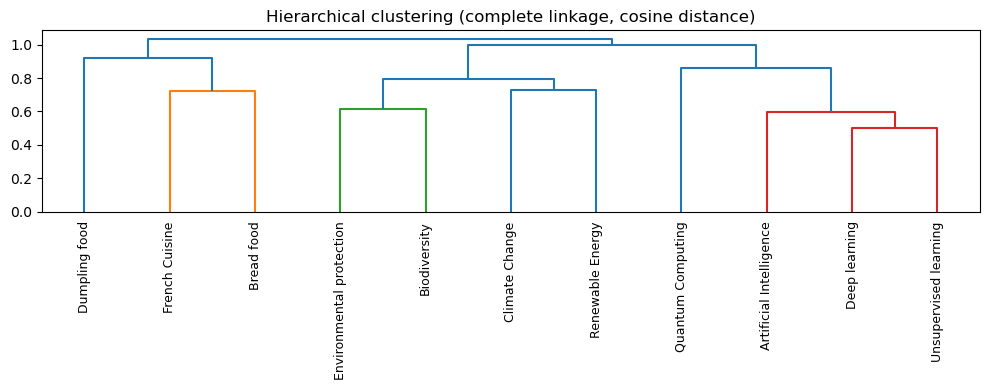

In [20]:
from scipy.cluster.hierarchy import fcluster
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

D_cond = pdist(emb_sents, metric="cosine")

Z = linkage(D_cond, method="complete")

# plot dendrogram
plt.figure(figsize=(10, 4))
dendrogram(
    Z,
    labels=wiki_df["wiki query"].tolist(),
    leaf_rotation=90,
    leaf_font_size=9,
)
plt.title("Hierarchical clustering (complete linkage, cosine distance)")
plt.tight_layout()
plt.show()

In [21]:

t = 0.92  # distance threshold
labels_1toK = fcluster(Z, t=t, criterion="distance")
# reindex to 0..C-1
_, inv = np.unique(labels_1toK, return_inverse=True)
hier_emb_labels = inv

In [22]:
wiki_df["emb_hierarchical"] = hier_emb_labels
wiki_df

,wiki query,text,n_words,bow_kmeans,emb_kmeans,emb_dbscan,emb_hierarchical
0,Artificial Intelligence,artificial intelligence ai is the capability of computational systems to perform tasks typically associated with human intelligence such as learning reasoning problem-solving perception and decision-making,25,1,2,0,2
1,Deep learning,in machine learning deep learning focuses on utilizing multilayered neural networks to perform tasks such as classification regression and representation learning,21,2,2,0,2
2,Unsupervised learning,in machine learning supervised learning sl is a type of machine learning paradigm where an algorithm learns to map input data to a specific output based on example input-output pairs,30,2,2,0,2
3,Quantum Computing,a quantum computer is a real or theoretical computer that uses quantum mechanical phenomena in an essential way it exploits superposed and entangled states and the intrinsically non-deterministic outcomes of quantum measurements as features of its computation,37,1,2,0,2
4,Environmental protection,environmental protection or environment protection refers to the taking of measures to protecting the natural environment prevent pollution and maintain ecological balance,22,0,0,1,1
5,Climate Change,present-day climate change includes both global warming—the ongoing increase in global average temperature—and its wider effects on earth climate system,20,1,0,1,1
6,Renewable Energy,renewable energy also called green energy is energy made from renewable natural resources that are replenished on a human timescale,20,1,0,1,1
7,Biodiversity,biodiversity is the variability of life on earth,8,1,0,1,1
8,French Cuisine,french cuisine is the cooking traditions and practices of france,10,1,1,2,0
9,Bread food,bread is a baked food product made from water flour and often yeast,13,1,1,2,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.6 Discussion
rubric={reasoning}

<div class="alert alert-info">

**Your tasks:**

Reflect on and discuss the clustering results of the methods you explored in the previous exercises, focusing on the following points:    
- effect of input representation on clustering results

- whether the clustering results match with your intuitions and the challenges associated with getting the desired clustering results with each method

</div>

<div class="alert alert-warning">

Solution_1.6
    
</div>

_Points:_ 4

Across all four clustering methods, the main takeaway is how strongly the input representation influences the results.
Using bag-of-words (BoW) with K-Means gave less meaningful clusters because it only looks at word counts and ignores semantics; for instance, “Artificial Intelligence,” “Deep learning,” and “Unsupervised learning” don’t necessarily share exact words, so BoW treated them as partially separate. The boundaries weren’t very clean, and a few unrelated items were grouped together due to word overlap rather than meaning.

In contrast, sentence embeddings captured the conceptual relationships much better. Both K-Means (embeddings) and DBSCAN found roughly the same three intuitive groups:

AI / Machine Learning topics

Environment / Sustainability topics

Food / Cuisine topics

This matched my earlier intuition about how the Wikipedia sentences are related.
DBSCAN was slightly more flexible because it automatically handled potential outliers and didn’t require manually specifying k. The hyperparameter tuning of eps and min_samples helped find a clean separation with three clusters and no major noise points.

Finally, hierarchical clustering using cosine distance visually confirmed the same pattern, the dendrogram clearly split into three main branches that align with those same topic categories. Although the branches were kind of short lived and not super long. Adjusting the cut threshold (we used 0.92) gave clusters consistent with the other methods.

Overall, clustering based on semantic embeddings produced results that made sense conceptually and aligned with my expectations, whereas BoW was more superficial and struggled with context. The main challenge across methods was tuning hyperparameters (like eps in DBSCAN, distance threshold in hierarchical) to get clean, balanced clusters without over- or under-splitting.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.7 Visualizing clusters
rubric={points:4}


One approach to working with unlabeled data is visualization. That said, our data is high-dimensional, making it challenging to visualize. Take sentence embedding representation as an example: each instance is depicted in 768 dimensions. To visualize such high-dimensional data, we can employ dimensionality reduction techniques to extract the most significant 2 or 3 components, and then visualize this low-dimensional data.

Given data as a `numpy` array and corresponding cluster assignments, the `plot_umap_clusters` function below transforms the data by applying dimensionality reduction technique called [UMAP](https://umap-learn.readthedocs.io/en/latest/) to it and plots the transformed data with different colours for different clusters.

> *Note: At this point we are using this function only for visualization and you are not expected to understand the UMAP part.*

You'll have to install the `umap-learn` package in the course conda environment either with `conda` or `pip`, as described in the [documentation](https://umap-learn.readthedocs.io/en/latest/index.html).

```
> conda activate cpsc330
> conda install -c conda-forge umap-learn
```
or

```
> conda activate cpsc330
> pip install umap-learn
```

If you get an error with the import below try

```
pip install --upgrade numba umap-learn
```

<div class="alert alert-info">
    
**Your tasks:**

1. Visualize the clusters created by the methods above using `plot_umap_clusters` function below. In other words, visualize clusters identified by each of the methods below.
    - K-Means with bag-of-words representation
    - K-Means with sentence embedding representation
    - DBSCAN with sentence embedding representation
    - Flat cluster of hierarchical clustering with sentence embedding representation
</div>

In [23]:
import umap

In [24]:
def plot_umap_clusters(
    data,
    cluster_labels,
    raw_texts=None,
    show_labels=False,
    point_size=50,
    n_neighbors=15,
    title="UMAP Visualization",
    ignore_noise=False,
):
    """
    Perform dimensionality reduction using UMAP and visualize the resulting clusters.

    Parameters
    ----------
    data : np.ndarray
        Feature matrix to be reduced.
    cluster_labels : array-like
        Cluster label for each data point.
    raw_texts : list of str, optional
        Original texts corresponding to the data points (used when show_labels=True).
    show_labels : bool, default=False
        Whether to annotate points with text labels.
    point_size : int, default=50
        Size of the scatterplot points.
    n_neighbors : int, default=15
        Number of neighbors used in UMAP.
    title : str, default="UMAP Visualization"
        Title of the plot.
    ignore_noise : bool, default=False
        Whether to exclude points labeled as noise (-1).

    Returns
    -------
    None
    """
    reducer = umap.UMAP(n_neighbors=n_neighbors, random_state=42)
    embedding = reducer.fit_transform(data)

    df = pd.DataFrame(embedding, columns=["dim1", "dim2"])
    df["cluster"] = cluster_labels

    if ignore_noise:
        df = df[df["cluster"] != -1]

    fig, ax = plt.subplots(figsize=(6, 5))
    ax.set_title(title)

    scatter = ax.scatter(
        df["dim1"], df["dim2"],
        c=df["cluster"], cmap="tab20b", s=point_size
    )

    ax.legend(*scatter.legend_elements(), title="Clusters", loc="best")

    if show_labels and raw_texts is not None:
        for (x, y, text) in zip(df["dim1"], df["dim2"], raw_texts):
            ax.annotate(" ".join(text.split()[:10]), (x, y), fontsize=8)

    plt.show()


<div class="alert alert-warning">

Solution_1.7
    
</div>

_Points:_ 4

/Users/kiki/miniforge3/envs/cpsc330-hw1/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/kiki/miniforge3/envs/cpsc330-hw1/lib/python3.13/site-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


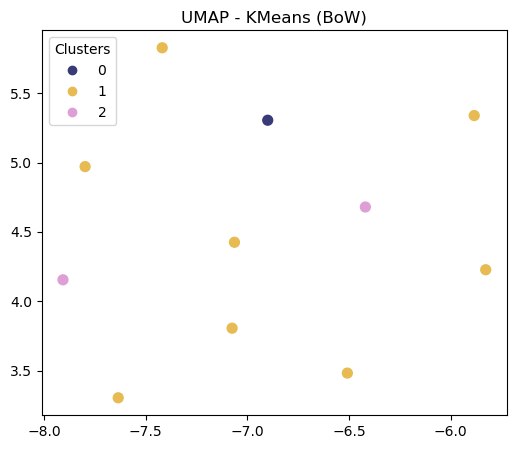

/Users/kiki/miniforge3/envs/cpsc330-hw1/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/kiki/miniforge3/envs/cpsc330-hw1/lib/python3.13/site-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


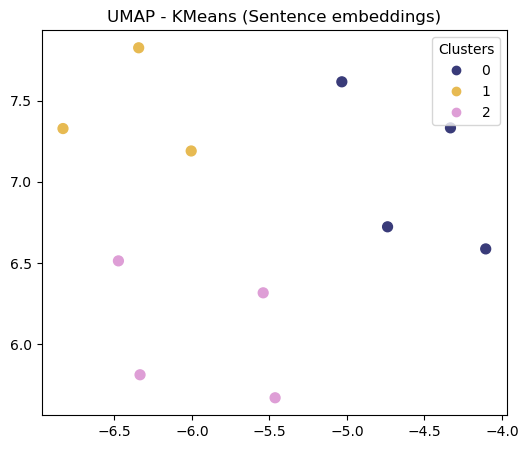

/Users/kiki/miniforge3/envs/cpsc330-hw1/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/kiki/miniforge3/envs/cpsc330-hw1/lib/python3.13/site-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


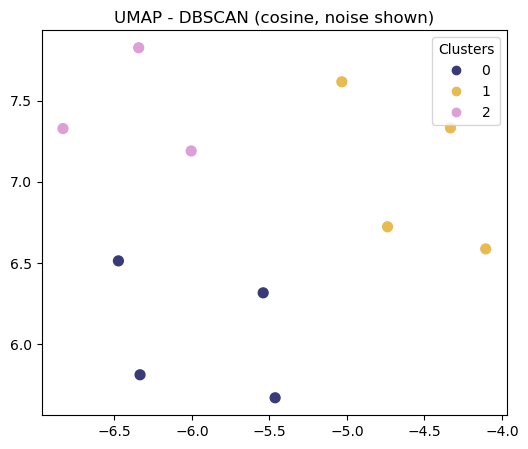

/Users/kiki/miniforge3/envs/cpsc330-hw1/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/kiki/miniforge3/envs/cpsc330-hw1/lib/python3.13/site-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


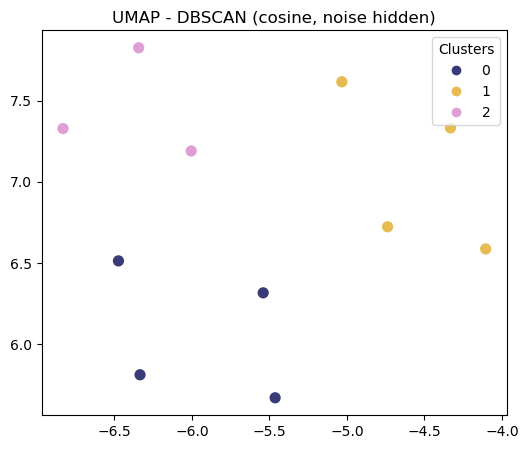

/Users/kiki/miniforge3/envs/cpsc330-hw1/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/kiki/miniforge3/envs/cpsc330-hw1/lib/python3.13/site-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


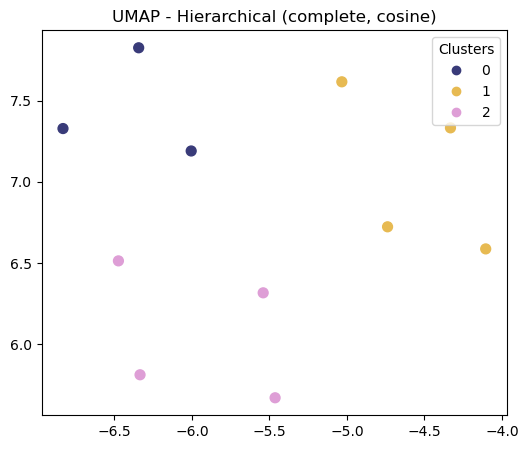

In [25]:
plot_umap_clusters(
    data=X_bow.toarray(),
    cluster_labels=kmeans_bow_labels,
    raw_texts=wiki_df["text"].tolist(),
    title="UMAP - KMeans (BoW)"
)
plot_umap_clusters(
    data=emb_sents,
    cluster_labels=kmeans_emb_labels,
    raw_texts=wiki_df["text"].tolist(),
    title="UMAP - KMeans (Sentence embeddings)"
)
# with noise points (label -1) shown
plot_umap_clusters(
    data=emb_sents,
    cluster_labels=dbscan_emb_labels,
    raw_texts=wiki_df["text"].tolist(),
    title="UMAP - DBSCAN (cosine, noise shown)",
    ignore_noise=False
)

# hide noise points for a clean cluster picture
plot_umap_clusters(
    data=emb_sents,
    cluster_labels=dbscan_emb_labels,
    raw_texts=wiki_df["text"].tolist(),
    title="UMAP - DBSCAN (cosine, noise hidden)",
    ignore_noise=True
)

plot_umap_clusters(
    data=emb_sents,
    cluster_labels=hier_emb_labels,
    raw_texts=wiki_df["text"].tolist(),
    title="UMAP - Hierarchical (complete, cosine)"
)



<!-- END QUESTION -->

<br><br><br><br>

## Exercise 2: [Food.com](https://www.food.com/) recipes
<hr>

Now that we have applied document clustering on a toy corpus, let's move to a more realistic corpus.

In the lecture, we worked on an activity of manually clustering food items and discussed challenges associated with it. We also applied different clustering algorithms to cluster food images. We'll continue this theme of clustering food items in this lab. But instead of images we will cluster textual description of food items, i.e., recipe names.   

In this assignment, we will work with a sample of [Kaggle's Food.com recipes corpus](https://www.kaggle.com/shuyangli94/food-com-recipes-and-user-interactions). This corpus contains 180K+ recipes and 700K+ recipe reviews. In this lab, we'll only focus on recipes and **not** on reviews. The recipes are present in `RAW_recipes.csv`. Our goal is to find categories or groupings of recipes from this corpus based on their names.

**Your tasks:**

- Download [`RAW_recipes.csv`](https://www.kaggle.com/shuyangli94/food-com-recipes-and-user-interactions?select=RAW_recipes.csv) and put it under the `data` directory in the homework folder.
- Run the code below. The dataset is quite large, and in this assignment, for speed, you will work with a sample of the dataset. The function `get_recipes_sample` below carries out some preliminary preprocessing and returns a sample of the recipes with most frequent tags.

> *Note: Depending upon the capacity of your computer, feel free to increase or decrease the size of this sample by changing the value for `n_tags`. If you decide to go with a different value of `n_tags`, state it clearly in Exercise 2.1 so that the grader knows about it.*

In [26]:
orig_recipes_df = pd.read_csv("data/RAW_recipes.csv", header=0)
orig_recipes_df.shape

(231637, 12)

In [27]:
orig_recipes_df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'depending on size of squash , cut into half or fourths', 'remove seeds', 'for spicy squash , drizzle olive oil or melted butter over each cut squash piece', 'season with mexican seasoning mix ii', 'for sweet squash , drizzle melted honey , butter , grated piloncillo over each cut squash piece', 'season with sweet mexican spice mix', 'bake at 350 degrees , again depending on size , for 40 minutes up to an hour , until a fork can easily pierce the skin', 'be careful not to burn the squash especially if you opt to use sugar or butter', 'if you feel more comfortable , cover the squash with aluminum foil the first half hour , give or take , of baking', 'if desired , season with salt']","autumn is my favorite time of year to cook! this recipe \r\ncan be prepared either spicy or sweet, your choice!\r\ntwo of my posted mexican-inspired seasoning mix recipes are offered as suggestions.","['winter squash', 'mexican seasoning', 'mixed spice', 'honey', 'butter', 'olive oil', 'salt']",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'breakfast', 'main-dish', 'pork', 'american', 'oven', 'easy', 'kid-friendly', 'pizza', 'dietary', 'northeastern-united-states', 'meat', 'equipment']","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough into the bottom and sides of a 12 inch pizza pan', 'bake for 5 minutes until set but not browned', 'cut sausage into small pieces', 'whisk eggs and milk in a bowl until frothy', 'spoon sausage over baked crust and sprinkle with cheese', 'pour egg mixture slowly over sausage and cheese', 's& p to taste', 'bake 15-20 minutes or until eggs are set and crust is brown']",this recipe calls for the crust to be prebaked a bit before adding ingredients. feel free to change sausage to ham or bacon. this warms well in the microwave for those late risers.,"['prepared pizza crust', 'sausage patty', 'eggs', 'milk', 'salt and pepper', 'cheese']",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'main-dish', 'chili', 'crock-pot-slow-cooker', 'dietary', 'equipment', '4-hours-or-less']","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add chopped onions to ground beef when almost brown and sautee until wilted', 'add all other ingredients', 'add kidney beans if you like beans in your chili', 'cook in slow cooker on high for 2-3 hours or 6-8 hours on low', 'serve with cold clean lettuce and shredded cheese']",this modified version of 'mom's' chili was a hit at our 2004 christmas party. we made an extra large pot to have some left to freeze but it never made it to the freezer. it was a favorite by all. perfect for any cold and rainy day. you won't find this one in a cookbook. it is truly an original.,"['ground beef', 'yellow onions', 'diced tomatoes', 'tomato paste', 'tomato soup', 'rotel tomatoes', 'kidney beans', 'water', 'chili powder', 'ground cumin', 'salt', 'lettuce', 'cheddar cheese']",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'occasion', 'side-dishes', 'eggs-dairy', 'potatoes', 'vegetables', 'oven', 'easy', 'dinner-party', 'holiday-event', 'easter', 'cheese', 'stove-top', 'dietary', 'christmas', 'new-years', 'thanksgiving', 'independence-day', 'st-pat

In [28]:
def get_recipes_sample(orig_recipes_df, n_tags=300, min_len=5):
    orig_recipes_df = orig_recipes_df.dropna()  # Remove rows with NaNs.
    orig_recipes_df = orig_recipes_df.drop_duplicates(
        "name"
    )  # Remove rows with duplicate names.
    # Remove rows where recipe names are too short (< 5 characters).
    orig_recipes_df = orig_recipes_df[orig_recipes_df["name"].apply(len) >= min_len]
    # Only consider the rows where tags are one of the most frequent n tags.
    first_n = orig_recipes_df["tags"].value_counts()[0:n_tags].index.tolist()
    recipes_df = orig_recipes_df[orig_recipes_df["tags"].isin(first_n)]
    return recipes_df

In [29]:
recipes_df = get_recipes_sample(orig_recipes_df)
recipes_df.shape

(9100, 12)

In [30]:
recipes_df["name"]

42        i yam what i yam  muffins    
101       to your health  muffins      
129       250 00 chocolate chip cookies
138       lplermagronen                
163       california roll   salad      
                   ...                 
231430    zucchini wheat germ cookies  
231514    zucchini blueberry bread     
231547    zucchini salsa burgers       
231596    zuppa toscana                
231629    zydeco salad                 
Name: name, Length: 9100, dtype: object

<br><br>

**In the rest of the homework, we will use `recipes_df` above, which is a subset of the original dataset.**

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### 2.1 Longest and shorter recipe names
rubric={points:2}

**Your tasks:**

1. Print the shortest and longest recipe names (length in terms of number of characters) from `recipes_df`. If there is more than one recipe with the same shortest/longest length, store **one** of them in `shortest_recipe` and/or `longest_recipe` as a **string**.

</div>

<div class="alert alert-warning">

Solution_2.1
    
</div>

_Points:_ 2

In [31]:
shortest_recipe = None
longest_recipe = None

shortest_idx = recipes_df["name"].str.len().idxmin()
longest_idx  = recipes_df["name"].str.len().idxmax()

shortest_recipe = recipes_df.at[shortest_idx, "name"]
longest_recipe  = recipes_df.at[longest_idx,  "name"]

print("Shortest:", shortest_recipe, f"({len(shortest_recipe)} chars)")
print("Longest :", longest_recipe,  f"({len(longest_recipe)} chars)")


Shortest: bread (5 chars)
Longest : baked tomatoes with a parmesan cheese crust and balsamic drizzle (64 chars)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### 2.2 More EDA
rubric={points:2}

**Your tasks:**
1. Create a word cloud for the recipe names. You can use [the `wordcloud` package](https://github.com/amueller/word_cloud) for this, which you will have to install in the course environment.
```
> conda activate cpsc330
> conda install -c conda-forge wordcloud
```

</div>

<div class="alert alert-warning">

Solution_2.2
    
</div>

_Points:_ 2

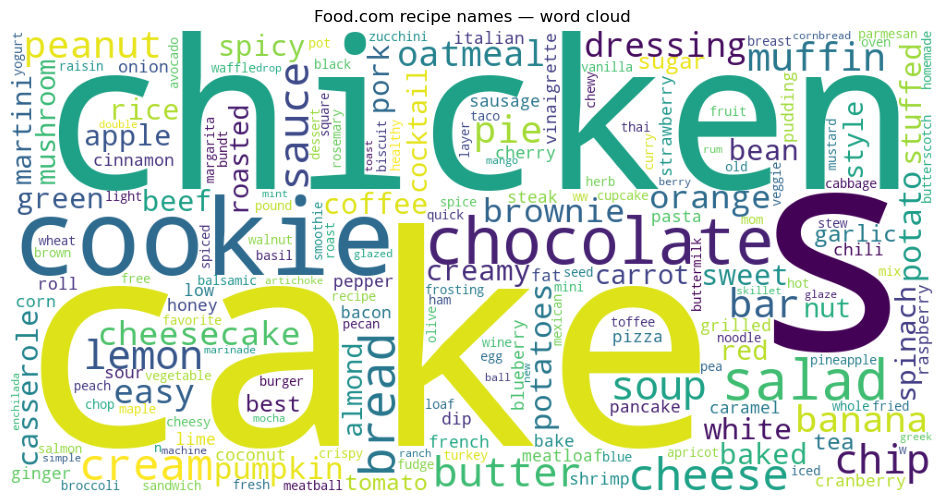

In [32]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Join all names into one big string
all_names = " ".join(recipes_df["name"].astype(str).tolist())

stops = STOPWORDS

wc = WordCloud(
    width=1000, height=500,
    background_color="white",
    stopwords=stops,
    collocations=False
).generate(all_names)

plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis("off")
plt.title("Food.com recipe names — word cloud")
plt.show()


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

### 2.3 Representing recipe names
rubric={points:3}

The next step is creating a representation of recipe names.

**Your tasks:**

1. Similar to Exercise 1, create sentence embedding representation of recipe names (`name` column in `recipes_df`).  For the rest of the homework, we'll stick to the sentence embedding representation of recipe names.


> You might have to convert the recipe names to a list (`recipes_df["name"].tolist()`) for the embedder to work
> *If you create a dataframe with sentence embedding representation, set the index to `recipes_df.index` so that the indices match with the indices of the sample we are working with.*  
> **This might take a while to run.**

</div>

<div class="alert alert-warning">

Solution_2.3
    
</div>

_Points:_ 3

In [33]:
from sentence_transformers import SentenceTransformer
embeddings = None

names_list = recipes_df["name"].tolist()

embeddings = embedder.encode(names_list, show_progress_bar=True)
embeddings_df = pd.DataFrame(embeddings, index=recipes_df.index)
embeddings_df

Batches:   0%|          | 0/285 [00:00<?, ?it/s]

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
42,0.019592,-0.088336,0.072677,-0.034575,-0.048741,-0.049801,0.175334,-0.055191,0.020301,0.019828,...,0.063293,-0.067171,0.087499,-0.061550,0.039297,-0.050147,0.027708,0.056843,0.056151,-0.122506
101,-0.000567,-0.011825,0.073199,0.058175,0.031688,-0.015428,0.168134,0.000466,0.033078,-0.013923,...,-0.012926,-0.015949,0.031315,-0.059074,0.014143,-0.047270,0.007844,0.035501,0.076061,-0.078119
129,-0.022604,0.065034,-0.033065,0.014450,-0.105039,-0.050559,0.100076,0.022929,-0.037398,0.011857,...,0.007971,-0.019165,0.004935,0.009005,0.000919,-0.040078,0.008650,-0.075781,-0.083477,-0.123240
138,-0.066915,0.025988,-0.087689,-0.006847,-0.012861,0.049035,0.035351,0.124966,-0.011697,-0.050179,...,-0.042345,-0.005794,-0.031800,0.120664,-0.057335,-0.077068,0.001653,-0.048223,0.116455,0.021789
163,-0.007068,-0.007308,-0.026629,-0.004153,-0.052810,0.011126,0.024000,-0.036993,0.023526,-0.046870,...,-0.018432,0.051918,0.036101,-0.035312,0.005817,0.101802,-0.063171,-0.007917,0.089744,0.006997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231430,-0.036366,0.087173,-0.039641,0.002705,0.097142,-0.075385,0.068207,0.010435,-0.069214,0.010464,...,0.050988,-0.064541,0.090829,-0.004570,0.079109,0.019663,-0.058483,-0.048723,0.019152,-0.012266
231514,-0.052718,0.008980,-0.046014,0.030194,0.005201,0.009964,-0.006760,0.030238,-0.031474,0.024632,...,0.075467,0.000967,0.085033,-0.006520,0.031094,0.072901,-0.094975,-0.052466,-0.003300,-0.006991
231547,-0.080801,0.004295,-0.044325,0.038307,-0.030125,-0.063566,0.004788,0.004822,0.015525,-0.040094,...,0.066642,0.016605,0.096211,-0.023969,0.045752,0.017091,-0.062939,-0.016950,0.012060,0.039776
231596,-0.060801,0.111672,-0.108755,0.052323,-0.099851,-0.027532,0.084190,-0.004861,0.002891,0.013944,...,0.038082,-0.014214,0.048392,0.050377,0.015281,0.106766,0.032009,0.020113,0.004977,-0.005828


<!-- END QUESTION -->

<br><br><br><br>

## Exercise 3: Clustering recipe names
<hr>

In this exercise you'll cluster recipe names with some of the clustering algorithms we have seen in class. This will also involve making some attempts to pick reasonable hyperparameter values for each clustering method based on the quality of the resulting clusters. For example, for KMeans, you need to specify the number of clusters in advance, which is often challenging on real-world datasets. For DBSCAN, you need to pick appropriate `eps` and `min_samples`. For hierarchical clustering, you need to pick a suitable linkage criterion, distance metric, and prune the tree so that it's possible to visualize and interpret it.

Here are some methods which may help you with picking reasonable values for the hyperparameters.
- Visualize the Elbow plot (KMeans).
- Visualize Silhouette plots.
- Visualize resulting clusters using `plot_umap_clusters` function from Exercise 1.
- Sample some recipes from each cluster, manually inspect whether there are coherent semantic themes. (For this, you may use the function `print_clusters` given below.)
        
> You may use the [`yellowbrick`](https://www.scikit-yb.org/en/latest/) package for visualizing the Elbow plot and the Silhouette plots. You can intall it with

```conda install -c districtdatalabs yellowbrick```

**Note that the process of picking reasonable hyperparameter values will be exploratory, iterative, and will involve manual inspection and judgment, as there is no ground truth to verify how well the model is doing. In your solutions, please do not include everything you try. Only present the results of the most informative trials. Add a narrative to your answer so that it's easy for the grader to follow your choices and reasoning.**

In [34]:
def print_clusters(recipes_df, cluster_labels, n_recipes=10, replace=False, random_state=None):
    """
    Given recipes_df containing recipe names and cluster assignment (labels),
    sample and print n_recipes recipes per cluster.

    Parameters
    -----------
    recipe_df : pandas dataframe
        recipes dataframe containing recipe names in the "name" column
    cluster_labels : ndarray or a list
        cluster labels for each row in recipes_df
    n_recipes : int
        number of examples to sample from each cluster
    replace: bool
        replace flag to pass to the sampling of recipe names

    Returns
    -----------
    None
    """

    grouped = (
        pd.DataFrame(
            {
                "name": recipes_df["name"],
                "cluster_label": cluster_labels,
            }
        )
        .sort_values("cluster_label")
        .groupby("cluster_label")
    )


    for name, group in grouped:
        cluster_size = len(group)
        n_samples = min(n_recipes, cluster_size)  # prevent oversampling
        print(f"Cluster {name}")
        print(("----------").format(""))
        print("\n".join(group.sample(n_samples, random_state=random_state, replace=replace)['name'].tolist()))
        print("\n\n")

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### 3.1 K-Means
rubric={points:6}

**Your tasks:**

1. Cluster recipe titles using KMeans. Make some attempts to determine the optimal number of clusters.
2. Pick one or two best models and justify your choice.

</div>

<div class="alert alert-warning">

Solution_3.1
    
</div>

_Points:_ 6

_Type your answer here, replacing this text._

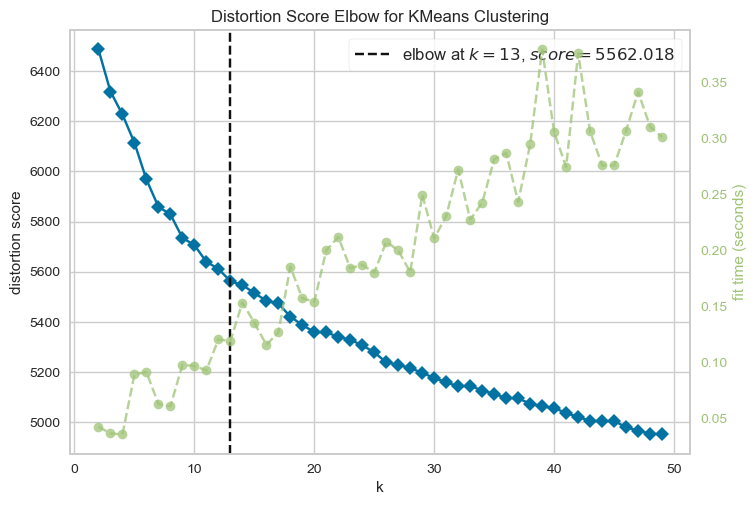

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,50))

visualizer.fit(embeddings_df)
visualizer.show()

When we performed an elbow plot of the k values between 2 to 50, the visualizer suggests that the point of inflection occurs around k = 16, meaning that inertia decrease begins to slow down around that point.

Because of this, i decided to look at the silhouette plots of k = 16 along with its neighbours.

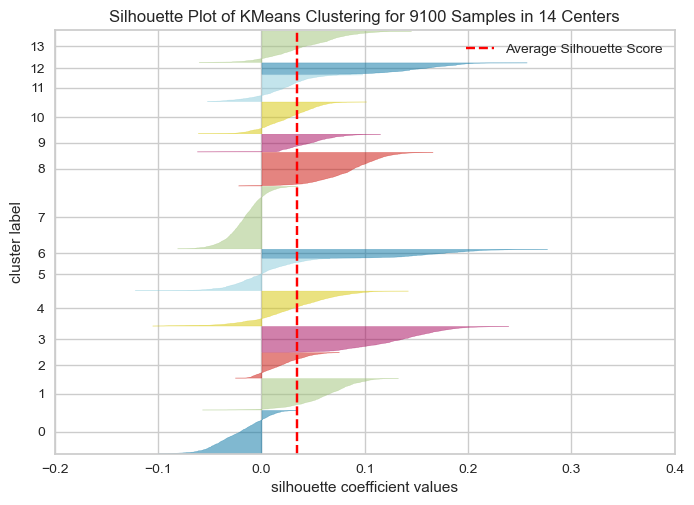

For k = 14, average silhouette score = 0.0345


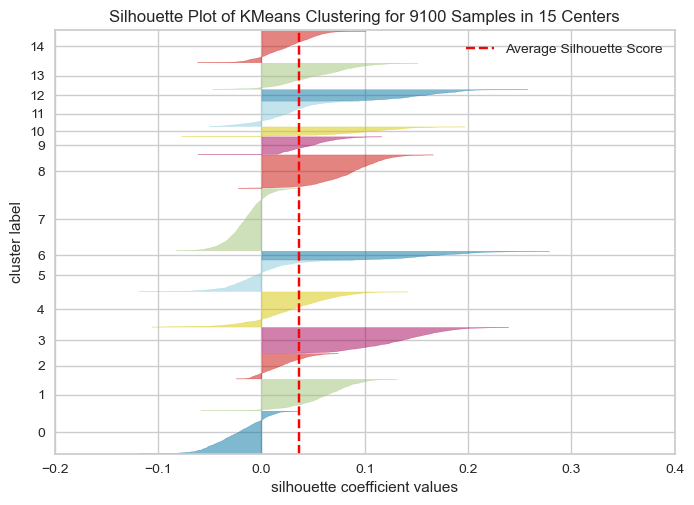

For k = 15, average silhouette score = 0.0361


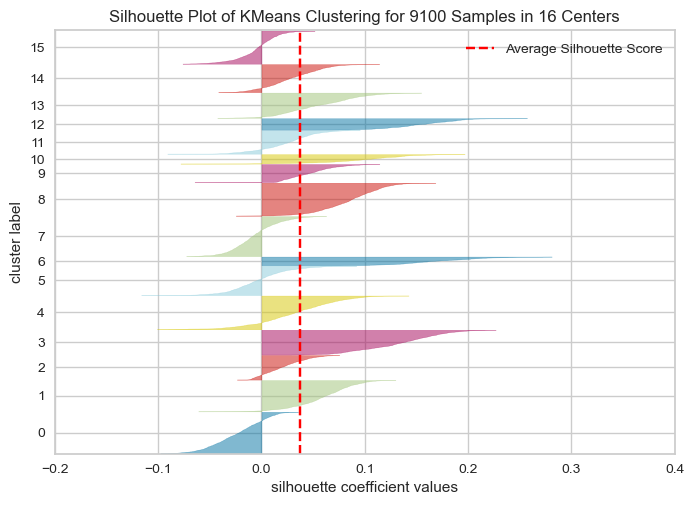

For k = 16, average silhouette score = 0.0376


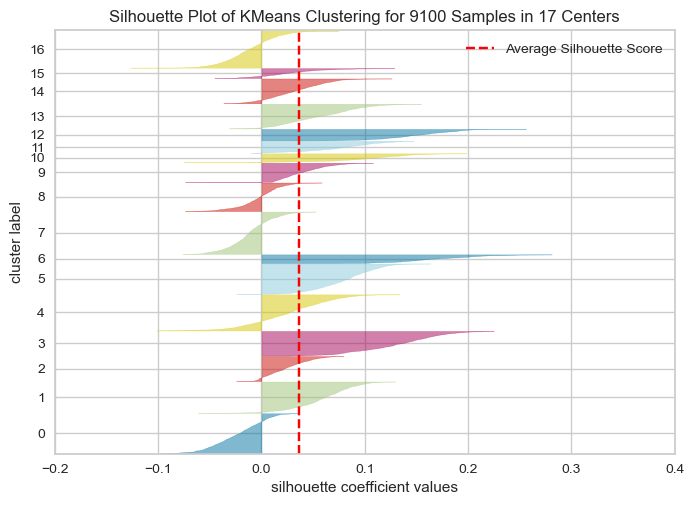

For k = 17, average silhouette score = 0.0366


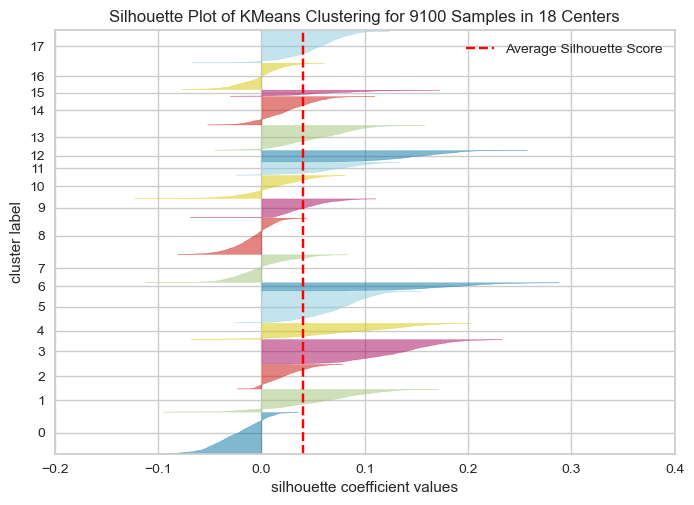

For k = 18, average silhouette score = 0.0401


In [36]:
# use silhouette method to find highest avg silhouette scores w/ good distributions in each cluster
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score


clusters_to_try = [14,15,16,17,18]
for curr_n in clusters_to_try:
  model = KMeans(n_clusters=curr_n, random_state=42)
  visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

  visualizer.fit(embeddings_df)
  visualizer.show()
  labels = model.fit_predict(embeddings_df)
  score = silhouette_score(embeddings_df, labels)
  print(f"For k = {curr_n}, average silhouette score = {score:.4f}")

Looking at the silhouette plots of the k = 16, along with its 4 neighbours, it seems that k=18 has the highest average silhouette score of 0.0504. Because k=18 is a value near the suggested inflection point(k=16), and it has a fairly high average silhouette score compared to other neighbours, I decided to choose k=18 as the best k.

I also like k=18 because there were around 15-20 "big" words in the word map we generated above. This tells me that having k around 15-20 would have a good chance at capturing the significant patterns in the sampled dataset

In [37]:
best_k = 18

kmeans_model = KMeans(n_clusters=best_k, random_state=42)
kmeans_labels = kmeans_model.fit_predict(embeddings_df)



In [38]:
cluster_sizes(kmeans_labels)

{np.int32(0): np.int64(904),
 np.int32(1): np.int64(498),
 np.int32(2): np.int64(537),
 np.int32(3): np.int64(534),
 np.int32(4): np.int64(348),
 np.int32(5): np.int64(691),
 np.int32(6): np.int64(179),
 np.int32(7): np.int64(603),
 np.int32(8): np.int64(795),
 np.int32(9): np.int64(412),
 np.int32(10): np.int64(502),
 np.int32(11): np.int64(279),
 np.int32(12): np.int64(249),
 np.int32(13): np.int64(542),
 np.int32(14): np.int64(621),
 np.int32(15): np.int64(133),
 np.int32(16): np.int64(581),
 np.int32(17): np.int64(692)}

In [39]:
print_clusters(recipes_df, kmeans_labels)

Cluster 0
----------
shrimp po boy
blackberry scones  ww
angel food torte
sex on the moon
loved up
prize winning festive phyllo tarts
hamners hammer
pendy s french dressing
wine poached plums
go go girl



Cluster 1
----------
nannie ruby s dago bread
white chocolate iced blueberry loaf
lemon loaf
southern style biscuits
best monte cristo sandwich
baked monte cristo sandwich
healthy whole wheat bread
stove top biscuits
maple pecan cornbread
sauerkraut rye bread  sugar free



Cluster 2
----------
nancy s lemon cake
polynesian cake and cream frosting
jack daniel s bundt cake
japanese green tea kasutera cake
banana pecan upside down cake
maple nut cake
everything but the kitchen sink cake
cooking light s spanish orange yogurt cake
galaxy mirror cake
the prospect s carrot cake



Cluster 3
----------
chicken and apple salad
warm spinach  fig  and prosciutto salad with honey balsamic vina
fresh basil and balsamic low fat salad dressing
goat cheese  greens  and walnut salad
chow mein chicke

/Users/kiki/miniforge3/envs/cpsc330-hw1/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


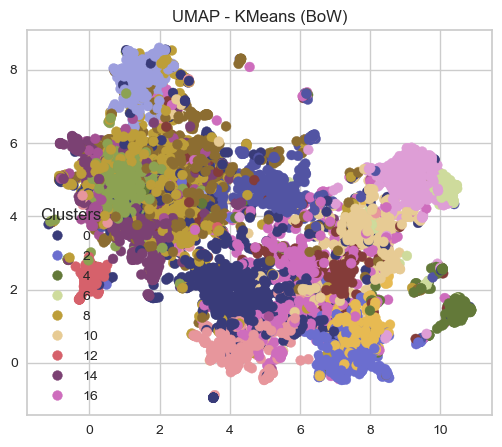

In [40]:
plot_umap_clusters(
    data=embeddings_df.to_numpy(),
    cluster_labels=kmeans_labels,
    raw_texts=names_list,
    title="UMAP - KMeans (BoW)"
)

the UMAP plot of KMeans shows how evenly distributed and balanced each cluster is, despite how connected that are.

<!-- END QUESTION -->

<br><br><br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### 3.2 DBSCAN
rubric={points:6}

**Your tasks:**

1. Cluster recipe names using `DBSCAN` with `metric="cosine"`. Make some attempts to tune the  hyperparameters `eps` and `min_samples`.

</div>

<div class="alert alert-warning">

Solution_3.2
    
</div>

_Points:_ 6

_Type your answer here, replacing this text._

In [41]:

from sklearn.datasets import make_blobs

print(embeddings_df.shape)


(9100, 384)


In [42]:
D = cosine_distances(embeddings_df)
upper = D[np.triu_indices_from(D, k=1)]
print(f"cosine distance stats  min={upper.min():.3f}  mean={upper.mean():.3f}  max={upper.max():.3f}")

cosine distance stats  min=0.000  mean=0.751  max=1.234


In [43]:
from collections import Counter

# try a variety of values here
eps_values = np.arange(0.3, 0.50, 0.05)
min_samples = [20,25,30,35,40]

rows = []


for min_sample in min_samples:
  for eps in eps_values:
      db = DBSCAN(eps=eps, min_samples=min_sample, metric='cosine')
      labels = db.fit_predict(embeddings_df)
      rows.append({
          "eps": float(eps),
          "min_samples": min_sample,
          "n_clusters": n_clusters(labels),
          "n_noise": int(np.sum(labels == -1)),
          "sizes": cluster_sizes(labels),
          "labels": labels,
          "silhouette_score": -1 if (n_clusters(labels) <= 1) else silhouette_score(embeddings_df, labels)
      })




In [44]:
# sort rows by silhouette score
res = pd.DataFrame([{k:v for k,v in r.items() if k!="labels"} for r in rows])
res.sort_values("silhouette_score", ascending=False, inplace=True)
res

,eps,min_samples,n_clusters,n_noise,sizes,silhouette_score
5,0.35,25,2,3702,"{0: 5374, 1: 24}",-0.005203
8,0.30,30,5,6585,"{0: 512, 1: 1869, 2: 54, 3: 52, 4: 28}",-0.021233
17,0.35,40,3,4483,"{0: 4548, 1: 34, 2: 35}",-0.028311
12,0.30,35,5,6926,"{0: 309, 1: 1693, 2: 90, 3: 38, 4: 44}",-0.031672
1,0.35,20,5,3345,"{0: 5697, 1: 19, 2: 12, 3: 12, 4: 15}",-0.032945
16,0.30,40,4,7199,"{0: 271, 1: 1536, 2: 56, 3: 38}",-0.033278
0,0.30,20,7,5860,"{0: 2940, 1: 111, 2: 96, 3: 23, 4: 20, 5: 26, 6: 24}",-0.052949
4,0.30,25,8,6256,"{0: 613, 1: 1985, 2: 60, 3: 20, 4: 25, 5: 92, 6: 24, 7: 25}",-0.054254
18,0.40,40,1,1994,{0: 7106},-1.000000
15,0.45,35,1,756,{0: 8344},-1.000000


I performed some experiementations with a wide range of of eps and min_samples combinations.

From the data above, it seems that an eps >= 0.40 will lead to minimal noise points, but it leads to one giant cluster because the majority of the points are seen as core points.

When min_samples is too big (>= 35), the majority of the dataset gets classified as noise points.

Therefore, it seems like the "sweet spot" is around eps=0.3 and min_samples=30

So I decided to do another round of tuning around that sweet spot below.

In [45]:
eps_values = np.arange(0.28, 0.32, 0.01) # 0.28 to 0.32
min_samples = np.arange(28,32,1) # 28 to 32

rows = []


for min_sample in min_samples:
  for eps in eps_values:
      db = DBSCAN(eps=eps, min_samples=min_sample, metric='cosine')
      labels = db.fit_predict(embeddings_df)
      rows.append({
          "eps": float(eps),
          "min_samples": min_sample,
          "n_clusters": n_clusters(labels),
          "n_noise": int(np.sum(labels == -1)),
          "sizes": cluster_sizes(labels),
          "labels": labels,
          "silhouette_score": -1 if (n_clusters(labels) <= 1) else silhouette_score(embeddings_df, labels)
      })

res = pd.DataFrame([{k:v for k,v in r.items() if k!="labels"} for r in rows])
res.sort_values("silhouette_score", ascending=False, inplace=True)
res


,eps,min_samples,n_clusters,n_noise,sizes,silhouette_score
2,0.30,28,5,6476,"{0: 565, 1: 1920, 2: 59, 3: 52, 4: 28}",-0.019089
6,0.30,29,5,6505,"{0: 552, 1: 1904, 2: 59, 3: 52, 4: 28}",-0.019709
10,0.30,30,5,6585,"{0: 512, 1: 1869, 2: 54, 3: 52, 4: 28}",-0.021233
14,0.30,31,5,6643,"{0: 488, 1: 1840, 2: 54, 3: 47, 4: 28}",-0.022156
15,0.31,31,5,6223,"{0: 641, 1: 102, 2: 2040, 3: 61, 4: 33}",-0.029199
5,0.29,29,5,7092,"{0: 293, 1: 1559, 2: 46, 3: 78, 4: 32}",-0.035139
1,0.29,28,6,7008,"{0: 324, 1: 1586, 2: 78, 3: 48, 4: 28, 5: 28}",-0.035908
11,0.31,30,6,6137,"{0: 675, 1: 102, 2: 2063, 3: 61, 4: 33, 5: 29}",-0.037534
9,0.29,30,5,7165,"{0: 258, 1: 1541, 2: 42, 3: 62, 4: 32}",-0.037896
3,0.31,28,7,5980,"{0: 692, 1: 2173, 2: 110, 3: 63, 4: 21, 5: 33, 6: 28}",-0.045747


I decided to go with eps=0.30 and min_samples=28 here because it yielded the highest silhouette score

In [46]:
best_eps = 0.30
best_ms = 28

best_dbs = DBSCAN(eps=best_eps, min_samples=best_ms, metric='cosine')
best_dbs.fit(embeddings_df)
labels = best_dbs.labels_
print_clusters(recipes_df, labels)

Cluster -1
----------
sand in your shorts
popcorn   biscotti
dijon cheesesteak hoagies
spoon cookies  lusikkaleivat  finland
irish cream cocoa mix
hot tiramisu drink
craze e caramelized onion  cranberry and blue cheese squares
low calorie and low fat cheesecake crustless
fudgy chocolate torte
good veggie skewers



Cluster 0
----------
easy pumpkin soup
bistro style mustard vinaigrette
curried corn salad with tomato
potato  cabbage  sausage soup
pan seared chicken with blueberry sauce
raspberry vinaigrette salad dressing
champagne chicken salad
lime chicken burritos
lemon pepper chicken with lemon wine sauce
layered tex mex salad with creamy lime dressing



Cluster 1
----------
dad s carrot cake
red cake
reese s mini pieces oatmeal cookies
cream cheese and chocolate muffin cakes
mom s peanut butter criss cross cookies
ginger oatmeal raisin cookies
very vanilla banana bread
pumpkin dessert
bacon   chocolate chip cookies with maple cinnamon glaze
the very easiest cookies recipe   cake m

/Users/kiki/miniforge3/envs/cpsc330-hw1/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


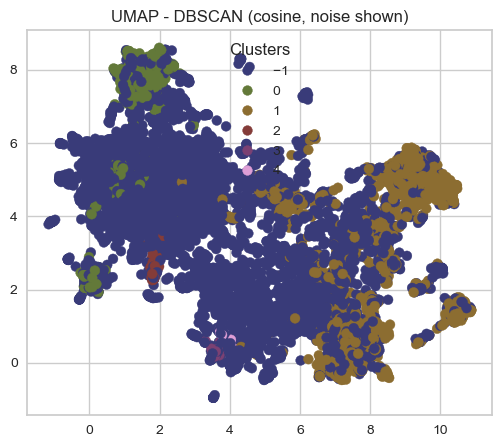

In [47]:


plot_umap_clusters(
    data=embeddings_df.to_numpy(),
    cluster_labels=labels,
    raw_texts=names_list,
    title="UMAP - DBSCAN (cosine, noise shown)",
    ignore_noise=False
)

When looking at the UMAP plot of our DBSCAN model, its subpar performance begins to make sense. It's really easy to form a giant cluster for DBSCAN here, because the majority of the data points are very close to each other, making it extremely hard to generate different clusters.

 If we attempt to set a high eps, DBSCAN will lead to one giant cluster becauase each point has many neighbours it can spread its cluster to.

 If we attempt to set a low eps, DBSCAN will lead to many noise points here, because most points will no longer have enough neighbors to be considered part of a dense region.

 Therefore, in our case, we had to settle with a fairly small eps which did cause us to have many noise points, but we were somewhat able to generate a few different clusters with acceptable distributions.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### 3.3 Hierarchical clustering
rubric={points:6}

**Your tasks:**

1. Try hierarchical clustering with `metric="cosine"` on this problem. Show a dendrogram by using a suitable truncation method.
2. Create flat clusters by cutting the tree at the appropriate level.

> *Note: Try orientation="left" of `dendrogram` for better readability of the dendrogram.*

</div>

<div class="alert alert-warning">

Solution_3.3
    
</div>

_Points:_ 6

_Type your answer here, replacing this text._

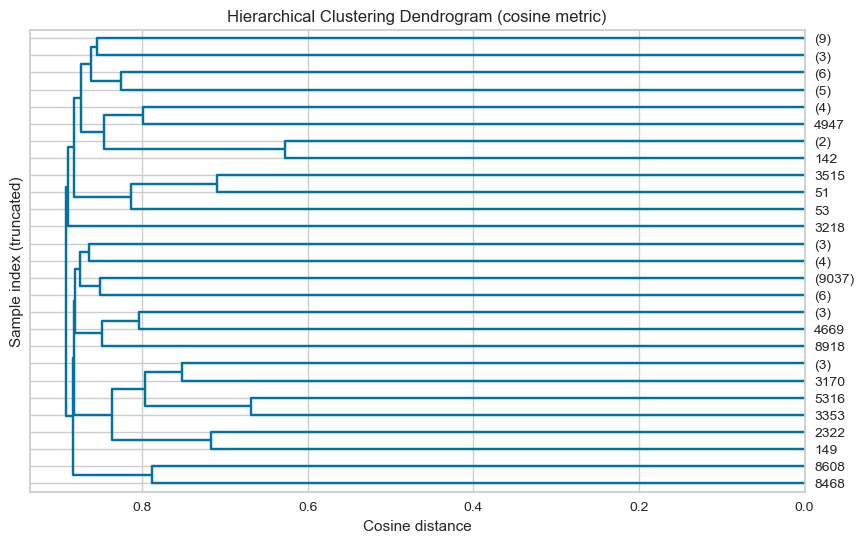

In [48]:
Z = linkage(embeddings_df, method='average', metric='cosine') # average linkage

plt.figure(figsize=(10, 6))
dendrogram(Z, truncate_mode="level", p=5, orientation="left")  # show only top 5 merge levels
plt.title("Hierarchical Clustering Dendrogram (cosine metric)")
plt.ylabel("Sample index (truncated)")
plt.xlabel("Cosine distance")
plt.show()

lower thresholds will simply have too many clusters. Therefore, i decided to only look at the higher level thresholds from 0.78 to 0.9 which ranges between 212 clusters to 4 clusters

In [49]:
threshold_range = np.arange(0.70, 0.89, 0.01)

for t in threshold_range:
    labels = fcluster(Z, t=t, criterion='distance')
    score = silhouette_score(embeddings_df, labels, metric='cosine')
    _, counts = np.unique(labels, return_counts=True)
    counts = [int(x) for x in counts]
    counts = sorted(counts, reverse=True)[:10]
    # sort cluster sizes descending, so we can see how big the largest clusters are
    print(f"t={t:.2f} -> clusters={len(np.unique(labels))}, silhouette={score:.3f}, n_clusters={n_clusters(labels),},top_10_cluster_sizes={counts}")

t=0.70 -> clusters=222, silhouette=-0.002, n_clusters=(222,),top_10_cluster_sizes=[2906, 2356, 402, 384, 362, 281, 223, 163, 128, 99]
t=0.71 -> clusters=196, silhouette=-0.007, n_clusters=(196,),top_10_cluster_sizes=[3313, 2519, 384, 377, 281, 233, 130, 108, 99, 93]
t=0.72 -> clusters=171, silhouette=-0.016, n_clusters=(171,),top_10_cluster_sizes=[3325, 3184, 655, 151, 145, 130, 110, 88, 72, 66]
t=0.73 -> clusters=145, silhouette=-0.007, n_clusters=(145,),top_10_cluster_sizes=[3430, 3329, 655, 261, 140, 88, 73, 66, 44, 43]
t=0.74 -> clusters=127, silhouette=-0.000, n_clusters=(127,),top_10_cluster_sizes=[3484, 3479, 916, 164, 73, 44, 43, 42, 30, 29]
t=0.75 -> clusters=109, silhouette=0.005, n_clusters=(109,),top_10_cluster_sizes=[3690, 3479, 944, 73, 47, 44, 43, 30, 29, 29]
t=0.76 -> clusters=87, silhouette=0.021, n_clusters=(87,),top_10_cluster_sizes=[3711, 3536, 944, 73, 60, 58, 58, 49, 30, 29]
t=0.77 -> clusters=75, silhouette=-0.031, n_clusters=(75,),top_10_cluster_sizes=[8262, 78,

t=0.88 has the highest silhouette score. However, its generated clusters are very uninformative, because it just has one giant cluster of ~9000 examples while the other 3 clusters are outlier points. Because of this, I decided to go with a threshold with a more balanced cluster distribution.

As a result, I chose 0.76, because it has good cluster distributions compared to other thresholds with good silhouette scores

In [50]:
def print_clusters_min_pop(recipes_df, cluster_labels, n_recipes=10, replace=False, random_state=None, min_cluster_size=0):
  # custom print_clusters function that only prints the clusters with at least min_cluster_size points

    grouped = (
        pd.DataFrame(
            {
                "name": recipes_df["name"],
                "cluster_label": cluster_labels,
            }
        )
        .sort_values("cluster_label")
        .groupby("cluster_label")
    )


    for name, group in grouped:
        cluster_size = len(group)
        n_samples = min(n_recipes, cluster_size)  # prevent oversampling
        if (cluster_size >= min_cluster_size):
          print(f"Cluster {name}")
          print(("----------").format(""))
          print("\n".join(group.sample(n_samples, random_state=random_state, replace=replace)['name'].tolist()))
          print("\n\n")



In [51]:
hc_labels1 = fcluster(Z, t=0.76, criterion='distance')

# there are over 87 clusters generated, but many of those only contain 1 or 2 recipes
# so we will only show clusters with at least 20 points here
print_clusters_min_pop(recipes_df, hc_labels1, min_cluster_size=20)

Cluster 17
----------
madelines
rich butterscotch squares
ruth s pumpkin dessert squares
densities  richest chocolate squares
kynda s squares
dr  cookie peanut butter squares
peanut butter chip squares
the best pumpkin squares
chocolate cream cheese squares
party dream squares



Cluster 26
----------
mom s chicken soup
uncle wayne s bloody mary
tre s famous bloody mary
hide those veggies mom sauce
let s do the congo with molly and her congo squares
bloody marys with attitude
mamma mia minestrone
mom toshi s party mix
tuscan minestrone
tuscan minestrone soup



Cluster 32
----------
stuffed fish  middle eastern  palestine
gingerbread made with tofu
kahlua and rum coffee
blind russian
kahlua latte
middle eastern lamb and okra stew  bamia stew
lite white russian
extreme kahlua chocolate mousse
lebanese white coffee kahwe bayda
kringle kocoa



Cluster 34
----------
chai tea mini biscuits
graham coconut squares
frosted spice latte
caramel frosting brown sugar drops
amaretto and cream
pink

/Users/kiki/miniforge3/envs/cpsc330-hw1/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


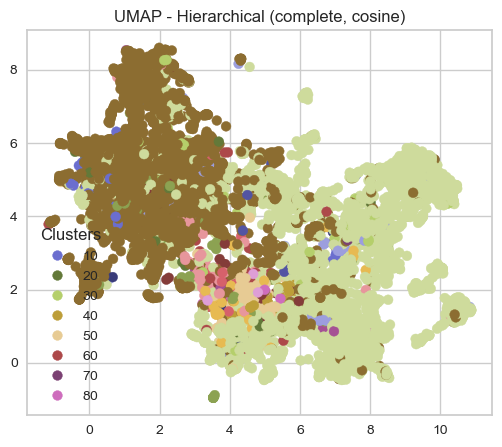

In [52]:
plot_umap_clusters(
    data=embeddings_df,
    cluster_labels=hc_labels1,
    raw_texts=names_list,
    title="UMAP - Hierarchical (complete, cosine)"
)

Looking at the UMAP plot of hierachal clustering, we can see two main evenly distributed clusters where the majority of recipes are classified, while there are many scattered and tiny clusters create that do not contain many recipe.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### 3.4 Manual interpretation of clusters
rubric={points:6}

**Your tasks:**

1. Label the topics/themes you see in the clusters created by different clustering methods.  
2. Do you see a common theme across clusters created by different clustering methods? Do you see any differences between the clusters created by different clustering methods?

</div>

<div class="alert alert-warning">

Solution_3.4
    
</div>

_Points:_ 6

1.

**KMeans:**

Cocktails and mixed drinks, Cakes, Salads and dressings, Seafood and savory dishes, Cookies, Carrot and citrus cakes, Chocolate and pound cakes, Chicken entrees, Potato and casserole dishes, Muffins and breakfast bakes, Pies and baked desserts, Meatloaf and hearty meat dishes, Breads and loaves, Bars and blondies, Alcoholic drinks and cocktails, Gourmet and savory entrees, Soups and stews, Sweet drinks and desserts


**DBSCAN:**

 Cookies and desserts, Meatloafs, Martinis, Margaritas
 - can't really find a main topic in the giant cluster, so i omitted it here


**Hierachal Clustering:**

Tropical and summer cocktails, Russian Recipes, Fruity snacks, Western-style food, Dessert bars and baked sweets, cakes and breakfasts, Italian and Latin-style main dishes, Weight Watchers and healthy meals, fruity desserts, cookies and baked treats, chocolate-based desserts, Mexican food







2.

**Differences:**

One key difference and strength of KMeans is that its clusters are **very evenly distributed and balanced**. As shown above, each cluster ranges between sizes of **~200 to 800**, which is good because **no single cluster dominates the dataset** and that **each group represents a meaningful portion** of the data, leading to more interpretable patterns in each cluster.

On the other hand, DBSCAN generated clusters were **extremely skewed** where there is **one extremely big cluster** containing many recipes, while other small clusters created are super tight and consistent. For instance, cluster 4 contains ONLY margaritas recipes, cluster 3 ONLY contains martinis, but cluster 1 is a GIANT cluster that contains a variety of recipes that may not share similarities, like "lemon thyme chicken" with "ramen cabbage salad". It should also be noted that a **big portion** of the recipes are noise points, causing them to **not belong to a cluster**.

Lastly, **Hierachal Clustering** wasn't as one-sided as DBSCAN, but it did create **two main clusters**, as the top 10 cluster sizes were [3626, 3569, 864, 129, 66, 59, 50, 48, 42, 40]. These two big clusters aren't very meaningful, but the smaller clusters (sizes between 40 - 120) were precise and informative, similar to DBSCAN. What is different is that these small clusters were successful at capturing underlying semantics of recipe names **without needing recipes to explicitly share keywords like DCSCAN did**.

For instance, Cluster 73 had a theme of small desserts, containing recipies like "pumpkin gooey squares", "vanilla fig squares", and "red velvet madeleines", where these similar dessert recipes are grouped without sharing keywords. However, it should be noted that there were also many outlier clusters generated by Hierachal Clustering that just contained 1 or 2 recipes, which isn't very useful for classification or interpretation.


**Similarities**

Across all three methods, they all seem to succeed at grouping recipes that have high relative frequency keywords. For instance, **"Cookies"** is one of the most frequent words shown in the word cloud, and all three methods were able to group cookie recipes into its own cluster.

<!-- END QUESTION -->

<br><br><br><br>

Before submitting your assignment, please make sure you have followed all the instructions in the Submission Instructions section at the top.

Here is a quick checklist before submitting:

- [ ] Restart kernel, clear outputs, and run all cells from top to bottom.  
- [ ] `.ipynb` file runs without errors and contains all outputs.  
- [ ] Only `.ipynb` and required output files are uploaded (no extra files).  
- [ ] Execution numbers start at **1** and are in order.  
- [ ] If `.ipynb` is too large and doesn't render on Gradescope, also upload a PDF/HTML version.  
- [ ] Reviewed the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2025W1/docs/homework_instructions.html).  

![](img/eva-well-done.png)